# Assignment 1.1

> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?


<div class="alert alert-block alert-info">
For all of the reading questions I recommend not using a LLM. The questions are designed to make sure you actually read and understand the textbook. If you don't do it yourself, it won't stick in your human brain!
</div>

- From a purely mathematical point of view, the way random networks were originally built (ER networks) meant that all nodes had a degree in the vicinity of $\langle k \rangle$, while the reality is that nodes' degree vary widely in real-world networks. This is due to the fact that real-world networks are not Poisson distributed. From a biologic and societal point of view, this means that in real-world networks, people tend to have relationships with people that already have many relationships: in plain terms, this means that nodes tend to establish edges with other nodes with a high degree, further supporting a non-Poisson degree distribution.

- The value of $\langle k \rangle$ determines the four regimes:
    - $0 < \langle k \rangle < 1$: Subcritical regime (resulting in the small-world effect where the network can not be connected)
    - $\langle k \rangle = 1$: Critical point
    - $1 < \langle k \rangle < \ln N$: Supercritical regime (a GCC emerges from the network, but isolated components are still present)
    - $\langle k \rangle \ge \ln N$: Connected regime (there is a high probability that there are no isolated components and that the network is fully connected)

- In real-world networks, the degree distribution is not in the vicinity of $\langle k \rangle$, but rather follows a power-law distribution. This means that hubs emerge in real networks, and their clustering coefficient is inevitably low (since many nodes connect to it, it's likely that those nodes are not connected between each other), but it is also true that hubs are a small minority of all the nodes, meaning that most of the nodes are actually grouped in smaller clusters with a high clustering coefficient. These considerations are not accounted in random networks because of the intrinsic model assumed.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

<div class="alert alert-block alert-info">
Again, I hope you will try solving the coding part of this on your own - especially the part that draws on NetworkX. The whole idea is to connect concepts from the literature to real-world code. And that learning happens when you try it on your own. I also recommend you do the loops on your own. It's OK to use LLMs to style the plot. 
</div>

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

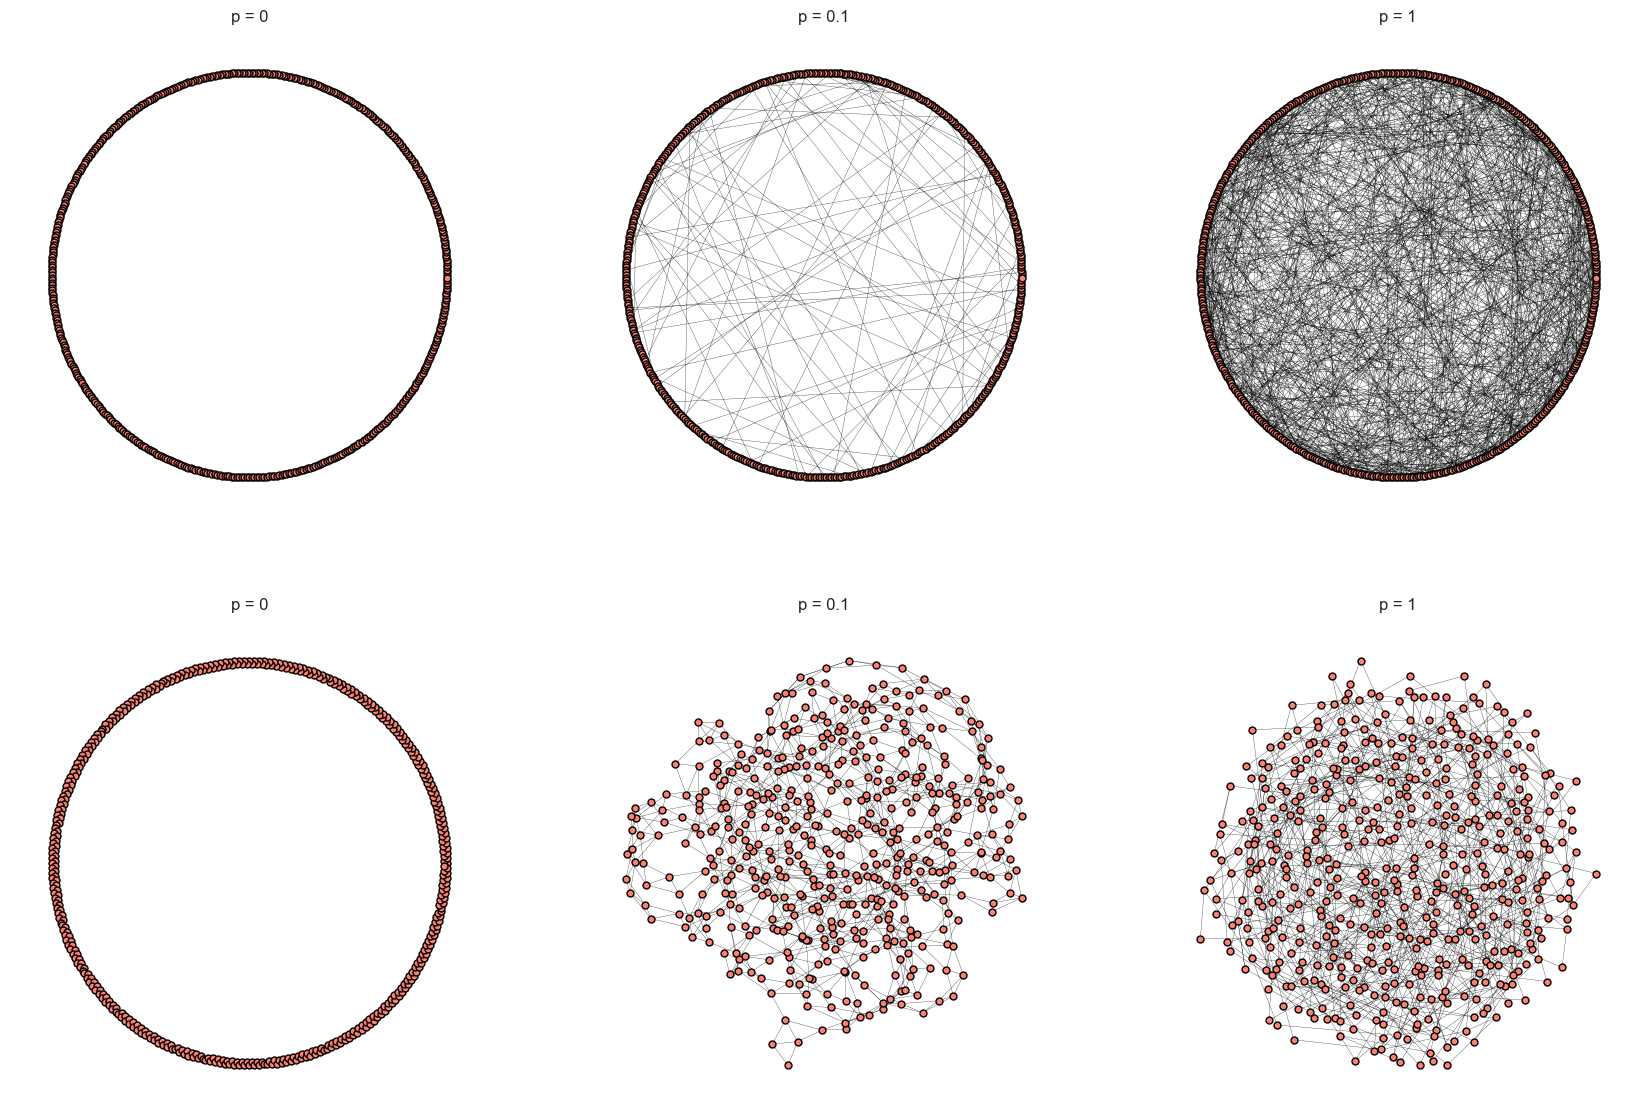

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

n = 500
k = 4
ps = [0, 0.1, 1] 
Gs = [nx.watts_strogatz_graph(n=n, k=k, p=p) for p in ps]

args = {
    "node_size": 25,
    "node_color": "salmon",
    "edge_color": "black",
    "node_shape": "o",
    "linewidths": 1,
    "width": 0.2,
    "edgecolors": "black",
    "font_color": "black",
    "with_labels": False,
}

plt.figure(figsize=(21, 14))

for i in range(len(Gs)):
    plt.subplot(2, 3, i + 1)
    nx.draw_circular(Gs[i], **args)
    plt.title(f"p = {ps[i]}")

for i in range(len(Gs)):
    plt.subplot(2, 3, 3 + i + 1)
    nx.draw_kamada_kawai(Gs[i], **args)
    plt.title(f"p = {ps[i]}")

plt.show()

In [37]:
print("Average shortest path length for Watts-Strogatz graphs:")
for i in range(len(Gs)):
    print(f"<d> for p={ps[i]:2f}: {nx.average_shortest_path_length(Gs[i])}")

Average shortest path length for Watts-Strogatz graphs:
<d> for p=0.000000: 62.875751503006015
<d> for p=0.100000: 7.608825651302605
<d> for p=1.000000: 4.739967935871744


For $p = 1$ most of the nodes will be directly connected to most of the other nodes, meaning that the average shortest path length will be very small. This results in the Watts-Strogatz graph becoming a Random network

Running simulation...
Simulation finished.

--- Threshold Results ---
Value of p for 50% drop: 0.0040
Value of p for 90% drop: 0.0516
Value of p for 95% drop: 0.1197
Value of p for 99% drop: 0.4195


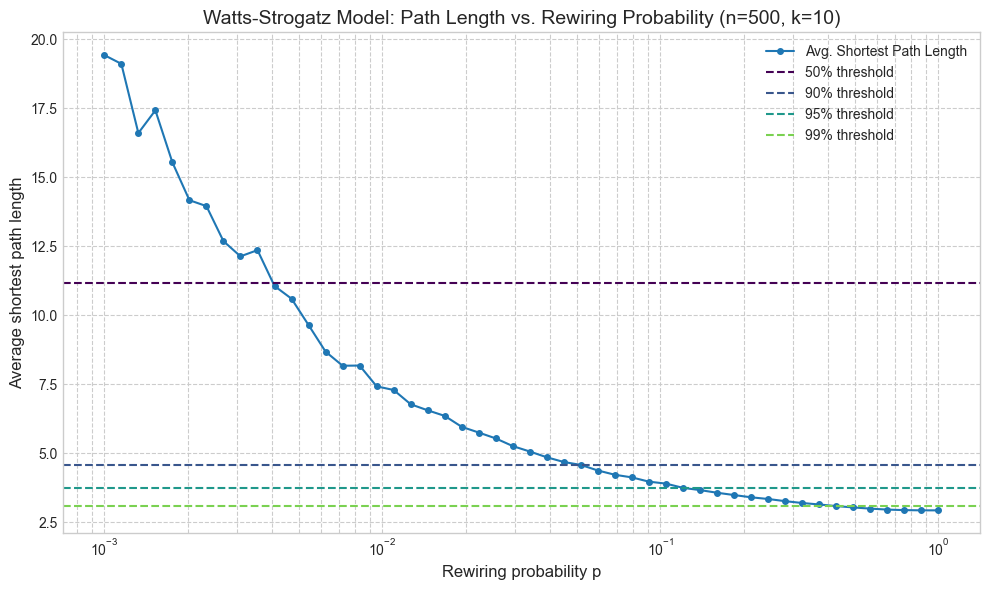

In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

n = 500
k = 10 

ps = np.logspace(-3, 0, 50)

distances = []
print("Running simulation...")
for p in ps:
    ds = []
    for _ in range(20):
        G = nx.watts_strogatz_graph(n=n, k=k, p=p)
        ds.append(nx.average_shortest_path_length(G))
    
    distances.append(np.mean(ds))
    # print(f"  p={p:.4f}, avg_path_length={distances[-1]:.4f}")

print("Simulation finished.\n")

distances = np.array(distances)
max_dist = np.max(distances)
min_dist = np.min(distances)
dist_range = max_dist - min_dist

threshold_percentages = [0.50, 0.90, 0.95, 0.99]
threshold_values = {
    f"{int(pct*100)}%": max_dist - pct * dist_range for pct in threshold_percentages
}

p_thresholds = {}
sorted_indices = np.argsort(distances)
sorted_distances = distances[sorted_indices]
sorted_ps = ps[sorted_indices]

print("--- Threshold Results ---")
for name, value in threshold_values.items():
    p_interp = np.interp(value, sorted_distances, sorted_ps)
    p_thresholds[name] = p_interp
    print(f"Value of p for {name} drop: {p_interp:.4f}")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ps, distances, marker='o', linestyle='-', markersize=4, label="Avg. Shortest Path Length")

colors = plt.cm.viridis(np.linspace(0, 0.8, len(threshold_values)))
for i, (name, value) in enumerate(threshold_values.items()):
    ax.axhline(
        y=value, 
        color=colors[i], 
        linestyle="--", 
        label=f"{name} threshold"
    )

ax.set_xscale("log")
ax.set_xlabel("Rewiring probability p", fontsize=12)
ax.set_ylabel("Average shortest path length", fontsize=12)
ax.set_title(f"Watts-Strogatz Model: Path Length vs. Rewiring Probability (n={n}, k={k})", fontsize=14)
ax.legend()
ax.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

In the plot above, the dashed lines highlight the values of $p$ for which drops of 50%, 90%, 95% and 99% of the interval between the maximum and minimum "Average shortest path length" are registered:
- Value of p for 50% drop: 0.0040
- Value of p for 90% drop: 0.0516
- Value of p for 95% drop: 0.1197
- Value of p for 99% drop: 0.4195

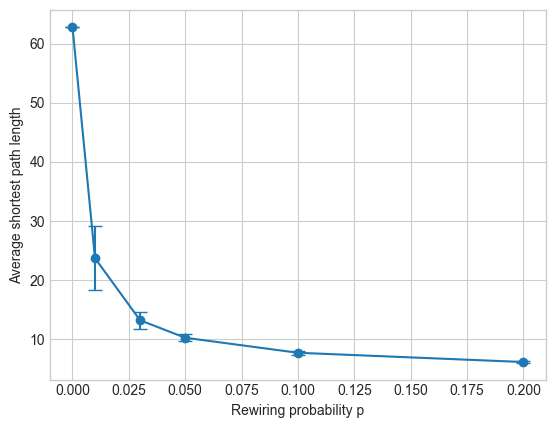

In [39]:
n, k = 500, 4
ps = [0.0, 0.01, 0.03, 0.05, 0.10, 0.20]

means = []
errors = []

for p in ps:
    ds = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(n=n, k=k, p=p)
        ds.append(nx.average_shortest_path_length(G))
    ds = np.array(ds)
    means.append(ds.mean())
    errors.append(ds.std())

plt.errorbar(ps, means, yerr=errors, fmt="o-", capsize=5)
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length")
plt.show()

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> 
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (*remember last week's exercise*), and as always, it's OK to ask your LLM for help with the styling. 
</div>

Slope dependent regimes of complex networks with power-law degree distributions:
- Anomalous regime: $\gamma \leq 2$ (this would cause the existence of a hub whose degree should grow faster than the growth of the network, resulting in an impossible real-world network)
- Scale-free regime: $2 < \gamma < 3$ (in this case the mean is finite but the variance is infinite, leading to a power-law distribution with a heavy tail)
- Random regime: $\gamma \geq 3$ (in this case the mean and variance are both finite, leading to a degree distribution localized in the vicinity of the mean, which is the principle of random networks)

Non-linear preferential attachement regimes:
- Sublinear: $0 < \alpha < 1$ (the degree distribution follows a "stretched exponential", resulting in a network neither random nor scale-free)
- Linear: $\alpha = 1$ (the degree distribution follows a power-law distribution, resulting in a perfectly scale-free network)
- Superlinear: $\alpha > 1$ (a few super hubs emerge from the network, resulting in a winner-takes-all dynamic)


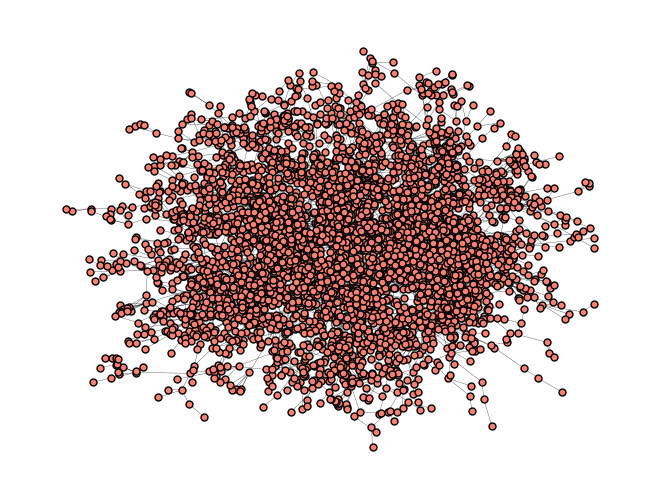

In [40]:
import random


def barabasi_albert_graph(dg = None, n=5000, directed=False):
    # If no graph is provided, create a new one
    if dg is None:
        G = nx.DiGraph() if directed else nx.Graph()

        # Create first link
        G.add_edge(0, 1)
    # If a graph is provided, extend it
    else:
        G = dg

    # For each subsequential node, add a link to a randomly chosen node from a weighted pool
    while G.number_of_nodes() < n:
        # Create the weighted pool (using the edgelist trick)
        edge_list_flatten = np.array(G.edges()).flatten()
        
        # Add the link to the graph based on the weighted pool
        G.add_edge(G.number_of_nodes(), random.choice(edge_list_flatten))

    return G


# Create the graph and add up to 500 nodes
n = 500
G = barabasi_albert_graph(n=n)

# Extend the existing graph up to 5000 nodes
n = 5000
G = barabasi_albert_graph(G, n)

nx.draw(G, **args)

In [41]:
degree_sequence = sorted((d for n, d in G.degree()))
min_degree, max_degree = degree_sequence[0], degree_sequence[-1]
print(f"Min degree: {min_degree}\nMax degree: {max_degree}")


Min degree: 1
Max degree: 75


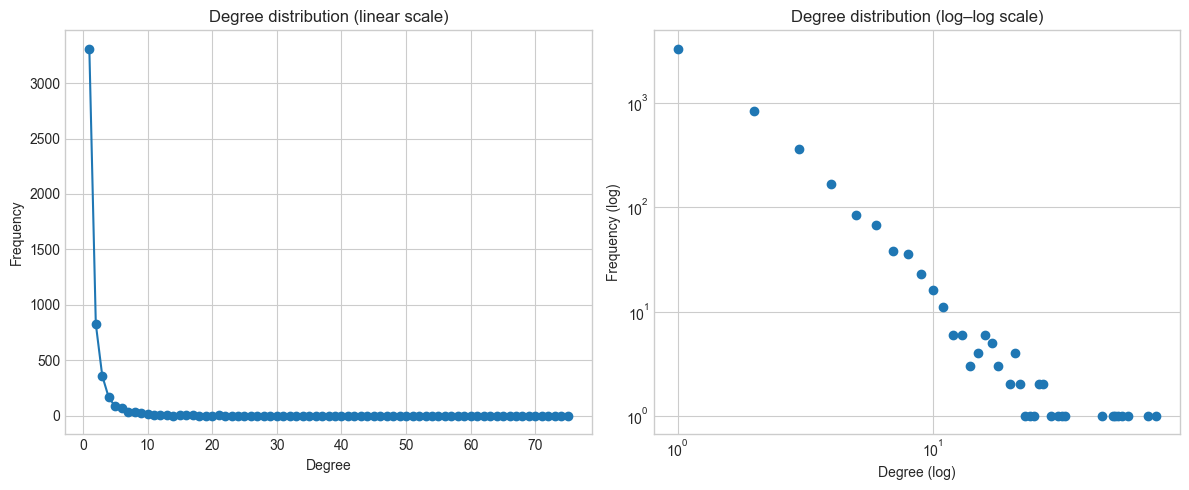

In [42]:
counts, bins = np.histogram(degree_sequence, bins=range(min_degree, max_degree+2))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(bins[:-1], counts, marker="o")
axes[0].set_xlabel("Degree")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Degree distribution (linear scale)")

axes[1].loglog(bins[:-1], counts, marker="o", linestyle="none")
axes[1].set_xlabel("Degree (log)")
axes[1].set_ylabel("Frequency (log)")
axes[1].set_title("Degree distribution (log–log scale)")

plt.tight_layout()
plt.show()

# Assignment 1.2


> *Exercise*: Build the network of Rock Performers 
>
> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 2*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


In [43]:
import json
import urllib.parse
import re

with open('performers_data.json', 'r', encoding='utf-8') as f:
    performers = json.load(f)

pattern = r'<a href=\"(/wiki/[^\">]*)[^>]*>(?:(?!.png)(?!cite).)*?</a>'

G = nx.DiGraph()

for performer in performers:
    performer_original = performer[0]
    G.add_node(performer_original, length_of_content=performer[2])
    performer = urllib.parse.quote(performer_original.encode('utf-8'))
    performer = performer.replace('/', '%2F')

    with open(f'performers/{performer}.json', 'r', encoding='utf-8') as f:
        html_content = json.load(f)
        html_content = html_content["parse"]["text"]["*"]

    links = re.findall(pattern, html_content)
    for link in links:
        link = link[6:]
        link = urllib.parse.quote(link.encode('utf-8'))
        link = link.replace('_', ' ')

        for other in performers:
            if link == other[0]:
                G.add_edge(performer_original, other[0])

In [50]:
nodes_to_remove = []
for node in G.nodes():
    if G.degree(node) == 0:
        nodes_to_remove.append(node)
G.remove_nodes_from(nodes_to_remove)

print(f"Removed {len(nodes_to_remove)} nodes")
print(f"Network now has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

sizes = []
node_list = list(G.nodes())
for node in node_list:
    sizes.append(G.in_degree(node))

Removed 0 nodes
Network now has 486 nodes and 11344 edges


In [51]:
node_degrees = [(
    node, 
    G.degree(node), 
    G.in_degree(node), 
    G.out_degree(node)
) for node in G.nodes()]

node_degrees.sort(key=lambda x: x[1], reverse=True)

print("Nodes ordered by degree (highest to lowest):")
for node, degree, in_, out_ in node_degrees:
    print(f"{node}:\t\t\t{degree} ({in_} | {out_})")

Nodes ordered by degree (highest to lowest):
AllMusic:			360 (358 | 2)
The Beatles:			319 (219 | 100)
Led Zeppelin:			241 (161 | 80)
The Rolling Stones:			233 (157 | 76)
U2:			226 (143 | 83)
David Bowie:			216 (135 | 81)
Red Hot Chili Peppers:			204 (120 | 84)
Bob Dylan:			204 (129 | 75)
Green Day:			201 (118 | 83)
Bruce Springsteen:			200 (122 | 78)
Aerosmith:			192 (114 | 78)
Coldplay:			191 (98 | 93)
Elton John:			188 (117 | 71)
Foo Fighters:			184 (111 | 73)
Jimi Hendrix:			184 (114 | 70)
Black Sabbath:			179 (103 | 76)
Paul McCartney:			178 (107 | 71)
John Lennon:			173 (107 | 66)
The Who:			169 (110 | 59)
Metallica:			168 (110 | 58)
Alanis Morissette:			168 (90 | 78)
Neil Young:			163 (92 | 71)
Ozzy Osbourne:			153 (96 | 57)
Eric Clapton:			149 (85 | 64)
Phil Collins:			146 (77 | 69)
George Harrison:			144 (74 | 70)
Bon Jovi:			144 (86 | 58)
Pearl Jam:			138 (89 | 49)
The Clash:			135 (75 | 60)
Elvis Presley:			132 (88 | 44)
Fleetwood Mac:			132 (80 | 52)
Peter Gabriel:			129 (73

*Excercise*: 
> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>    * Then, write a short section about which part of the process that was most difficult
>    * Next write a short section about how you used LLMs to help you
>    * Finally, compose a short section about what you would do differently if you had to do it again
<div class="alert alert-block alert-info">
Use your own words here. Writing makes you better at thinking! Train that brain.
</div>

This is the process we followed:
1. We dowonloaded the wikitext of the wikipedia page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers (by toggling the "edit" mode and copy-pasting the text)
2. We extracted all of the performers-links using regular expressions
3. We used the wikipedia API to download the wikitext of each performer-page
4. We extracted all of the internal wikipedia-links that connected the listed performers
5. We created the network based on the extracted links



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

In [52]:
print(G.number_of_nodes())
print(G.number_of_edges())

486
11344


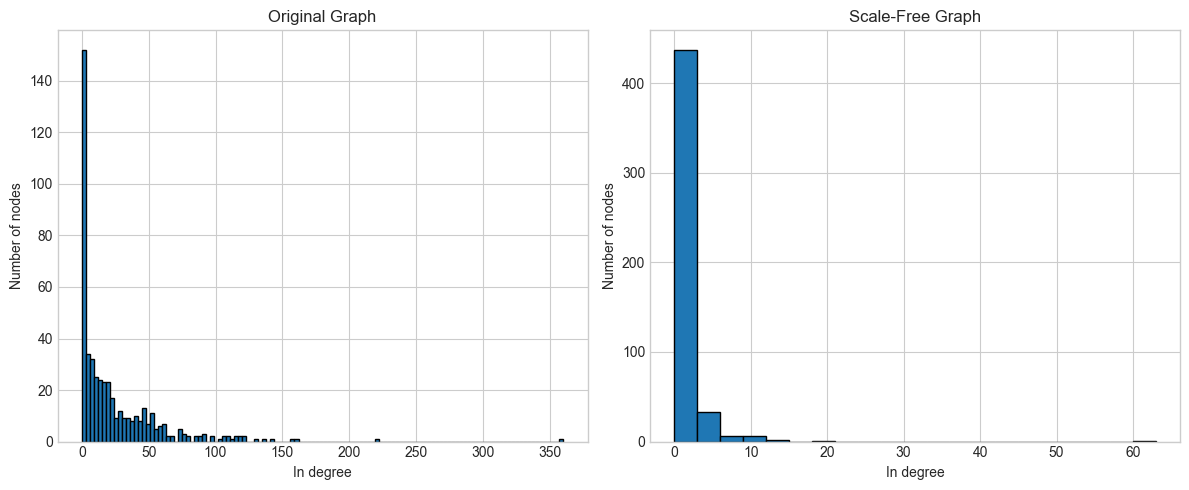

In [53]:
bucket_size = 3

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original graph
degrees = [G.in_degree(n) for n in G.nodes()]
axes[0].hist(degrees, bins=range(0, max(degrees) + 3, bucket_size), edgecolor='black')
axes[0].set_xlabel("In degree")
axes[0].set_ylabel("Number of nodes")
axes[0].set_title("Original Graph")

# Scale-free graph
scaleFreeG = barabasi_albert_graph(n=G.number_of_nodes(), directed=True)

degrees_sf = [scaleFreeG.in_degree(n) for n in scaleFreeG.nodes()]
axes[1].hist(degrees_sf, bins=range(0, max(degrees_sf) + 3, bucket_size), edgecolor='black')
axes[1].set_xlabel("In degree")
axes[1].set_ylabel("Number of nodes")
axes[1].set_title("Scale-Free Graph")

plt.tight_layout()
plt.show()

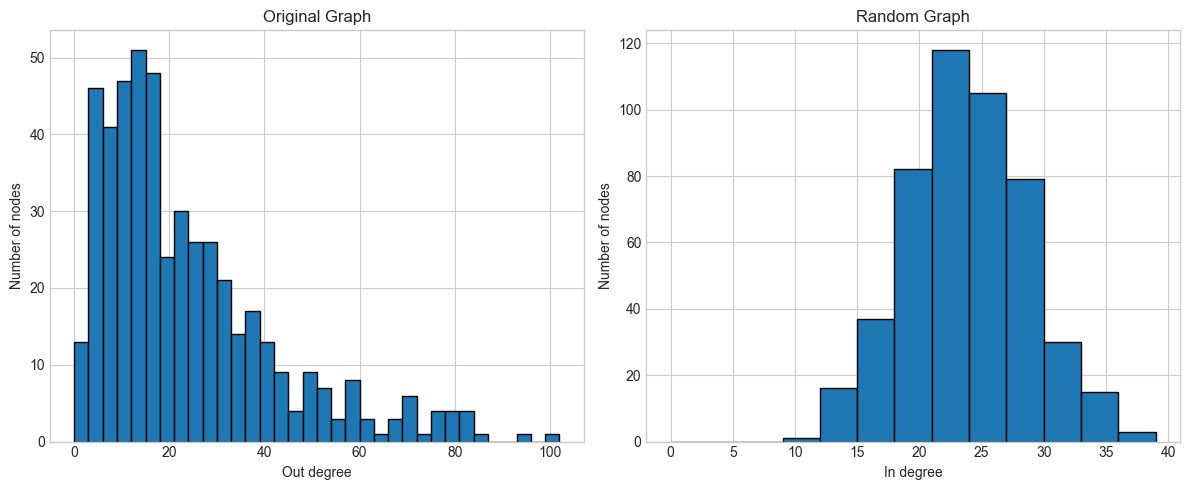

In [54]:
bucket_size = 3

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original graph
degrees = [G.out_degree(n) for n in G.nodes()]
axes[0].hist(degrees, bins=range(0, max(degrees) + 3, bucket_size), edgecolor='black')
axes[0].set_xlabel("Out degree")
axes[0].set_ylabel("Number of nodes")
axes[0].set_title("Original Graph")

# Random graph
n = G.number_of_nodes()
p = G.number_of_edges() / ((n - 1) * n)
randomG = nx.gnp_random_graph(n=G.number_of_nodes(), p=p, directed=True)

degrees_rnd = [randomG.out_degree(n) for n in randomG.nodes()]
axes[1].hist(degrees_rnd, bins=range(0, max(degrees_rnd) + 3, bucket_size), edgecolor='black')
axes[1].set_xlabel("In degree")
axes[1].set_ylabel("Number of nodes")
axes[1].set_title("Random Graph")

plt.tight_layout()
plt.show()

In [55]:
performers.sort(key=lambda x: x[2], reverse=True)
for i in range(10):
    print(f'{i + 1}: {performers[i][0]} ({performers[i][2]})')

1: The Beatles (42187)
2: Paul McCartney (41466)
3: Bob Dylan (41191)
4: Guns N' Roses (40504)
5: The Beach Boys (38419)
6: Elton John (37558)
7: U2 (36000)
8: David Bowie (35865)
9: The Rolling Stones (35593)
10: Queen (band) (35487)
